In [102]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
store = pd.read_csv("store.csv")
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [103]:
train = pd.read_csv("train.csv")
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test = pd.read_csv("test.csv")

### Combine the training and the store data based on the column they have in common- Store

In [5]:
combined = pd.merge(store, train, on = 'Store')

In [6]:
combined.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


## Addressing Null Values

In [7]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [8]:
# The Promo2 Week, Year, and Interval all have zeros because Promo2 is 0, so we can just fill these with zeros

store.update(store[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].fillna(0))

In [9]:
# I will fill in the competition distance with the mean of the column

mean_comp_dist = store['CompetitionDistance'].mean()
store['CompetitionDistance'].fillna(mean_comp_dist, inplace = True)

In [10]:
# I will fill in the CompetitionOpenSinceMonth and CompetitionOpenSinceYear with the mode
mode_CompetitionOpenSinceMonth = store['CompetitionOpenSinceMonth'].mode()[0]
#since there can be ties with the mode, we are using [0] to return the first one
mode_CompetitionOpenSinceYear = store['CompetitionOpenSinceYear'].mode()[0]

store['CompetitionOpenSinceMonth'].fillna(mode_CompetitionOpenSinceMonth, inplace = True)
store['CompetitionOpenSinceYear'].fillna(mode_CompetitionOpenSinceYear, inplace = True)

In [11]:
combined = pd.merge(train, store, on = 'Store')

In [12]:
combined.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## All NA's are removed

## Visualizing the data

In [14]:
#separating the month and year 

combined['Date'] = pd.to_datetime(combined['Date'])
combined['Year'] = combined['Date'].dt.year
combined['Month'] = combined['Date'].dt.month

Sales_Year = combined.groupby('Year')['Sales'].mean().reset_index()
Sales_Year.sort_values('Sales', ascending = True, inplace = True)
Sales_Year = Sales_Year.set_index('Year')

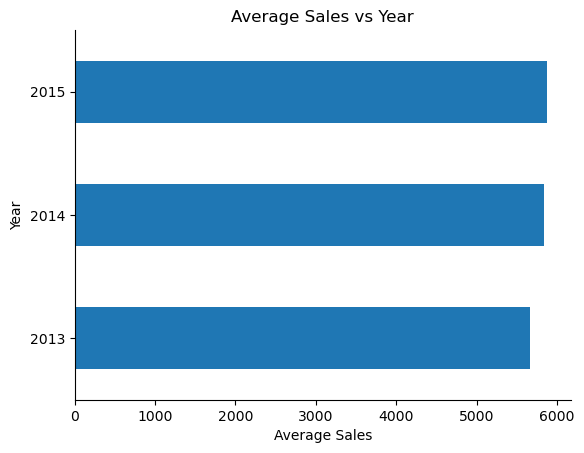

In [15]:
ax = Sales_Year.plot(kind = 'barh')
ax.set_ylabel("Year")
ax.set_xlabel("Average Sales")
ax.set_title("Average Sales vs Year")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend().set_visible(False)

## We can see the average sales per year are similar, with it increasing slightly every year

## Let's look at the relationship between sales and the day of the week

In [17]:
Sales_DayOfWeek = combined.groupby('DayOfWeek')['Sales'].mean().reset_index()
Sales_DayOfWeek.sort_values('Sales', ascending = True, inplace = True)
Sales_DayOfWeek = Sales_DayOfWeek.set_index('DayOfWeek')

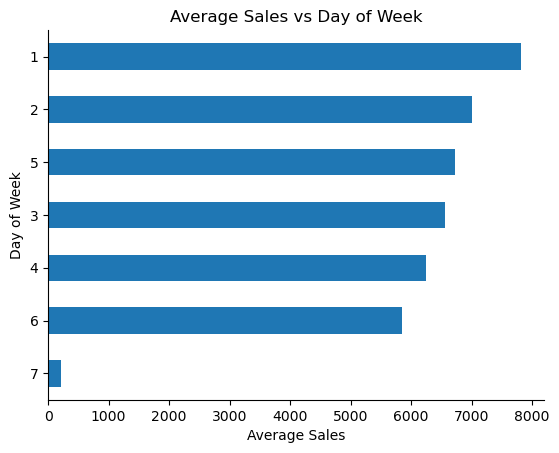

In [18]:
ax = Sales_DayOfWeek.plot(kind = 'barh')
ax.set_ylabel("Day of Week")
ax.set_xlabel("Average Sales")
ax.set_title("Average Sales vs Day of Week")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend().set_visible(False)
         

## We can clearly see the day of the week makes a difference.  Monday's (1), Tuesday's (2), and Friday's (5) have the highest sales, with Sunday (7) coming up the least amount of sales by far

In [19]:
Sales_Promo = combined.groupby('Promo')['Sales'].mean().reset_index()
Sales_Promo.sort_values('Sales', ascending = True, inplace = True)
Sales_Promo = Sales_Promo.set_index('Promo')

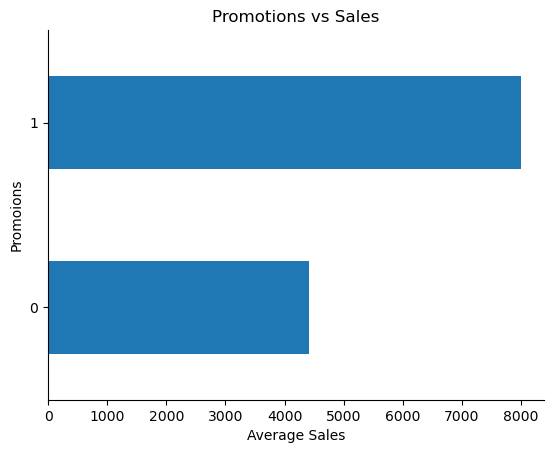

In [20]:
ax = Sales_Promo.plot(kind = 'barh')
ax.set_ylabel("Promoions")
ax.set_xlabel("Average Sales")
ax.set_title("Promotions vs Sales")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend().set_visible(False)

## We can clearly see there is a difference in sales, whether there is a promotion going on (1), versus when there is not (0)

In [104]:
combined['StateHoliday'].loc[combined['StateHoliday'] == 0] = "0"

Sales_StateHoliday = combined.groupby('StateHoliday')['Sales'].mean().reset_index()
Sales_StateHoliday.sort_values('Sales', ascending = True, inplace = True)
Sales_StateHoliday = Sales_StateHoliday.set_index('StateHoliday')

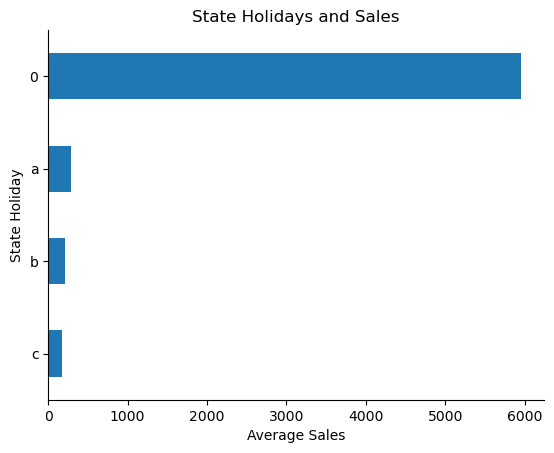

In [22]:
ax = Sales_StateHoliday.plot(kind = 'barh')
ax.set_ylabel("State Holiday")
ax.set_xlabel("Average Sales")
ax.set_title("State Holidays and Sales")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend().set_visible(False)

0 = No Holiday
A = State Public Holiday
B = Easter
C = Christmas

### It is interesting to note that holidays don't have much affect on sales.  This makes sense for (b) and (c) as Easter and Christmas are likely to have no or very little stores open, but public holidays are a potential shopping day for many people with the day off.  This visual in itself can give provide the store with insights into keeping staffing down on these holidays, and review whether or not a promotion would be worth running during state holidays if sales are not going to pay off.

In [23]:
combined.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int32
Month                                 int32
dtype: object

In [24]:
# now that we have separated month and year, we can drop the date column

combined.drop(['Date'], axis = 1, inplace = True)

## Encoding categorical variables

### This will get the data ready for the machine learning models

In [25]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

combined['StoreType'] = encoder.fit_transform(combined['StoreType'])
#this will create 4 columns separate columns for Store Type
combined['Assortment'] = encoder.fit_transform(combined['Assortment'])

combined.tail(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
1017199,1115,4,5007,339,1,1,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017200,1115,3,4649,324,1,1,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017201,1115,2,5243,341,1,1,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017202,1115,1,6905,471,1,1,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017203,1115,7,0,0,0,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017204,1115,6,4771,339,1,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017205,1115,5,4540,326,1,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017206,1115,4,4297,300,1,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017207,1115,3,3697,305,1,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1
1017208,1115,2,0,0,0,0,a,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1


In [105]:
# We see that the promotion intervals are set by a specific months: Mar, Jun, Sept, and Dec being one.
# we can encode these slightly differently: 

combined['PromoInterval'].loc[combined['PromoInterval'] == 'Jan,Apr,Jul,Oct'] = 1
combined['PromoInterval'].loc[combined['PromoInterval'] == 'Feb,May,Aug,Nov'] = 2
combined['PromoInterval'].loc[combined['PromoInterval'] == 'Mar,Jun,Sept,Dec'] = 3

In [106]:
#State holiday is categorized as a, b, and c:

combined['StateHoliday'].loc[combined['StateHoliday'] == 'a'] = 1
combined['StateHoliday'].loc[combined['StateHoliday'] == 'b'] = 2
combined['StateHoliday'].loc[combined['StateHoliday'] == 'c'] = 3

In [28]:
combined.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Year                           int32
Month                          int32
dtype: object

In [29]:
#StateHoliday and PromoIntervals are still objects- will move to numeric

combined['StateHoliday'] = pd.to_numeric(combined['StateHoliday'])
combined['PromoInterval'] = pd.to_numeric(combined['PromoInterval'])

In [30]:
combined.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
Year                           int32
Month                          int32
dtype: object

## The last cleaning I want to do is look at the distribution of the sales and remove any outliers, so we can get a better prediction

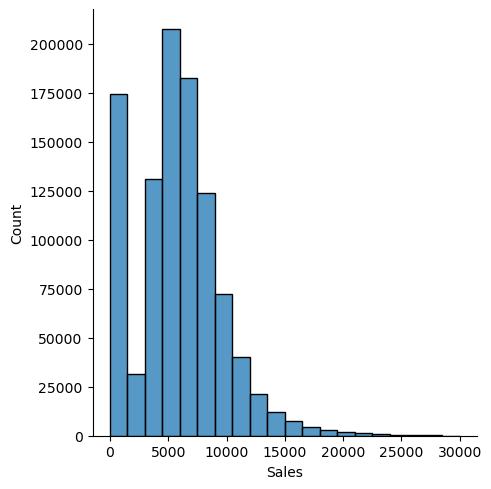

In [107]:
sns.displot(combined, x = 'Sales', bins = 20)

<Axes: >

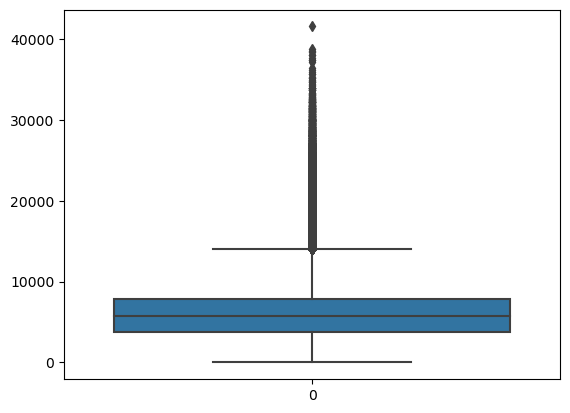

In [32]:
sns.boxplot(combined['Sales'])

## Data is highly right skewed, indicating some smaller counts of higher sales to the right.  We can also see heavy high outliers in box plot as well.

## Based on the distribution, we will want to remove any sales above 30K.  We can do this using the z-score; this tells us how many standard deviations above or below the mean a specific number is.  It can be calculated as the number minus the mean, divided by the standard deviation of sales.  So, we will setup to remove outliers based on the z-score

In [33]:
mean_sales = np.mean(combined['Sales'])
std_sales = np.std(combined['Sales'])
print(mean_sales)
print(std_sales)

5773.818972305593
3849.9242828437527


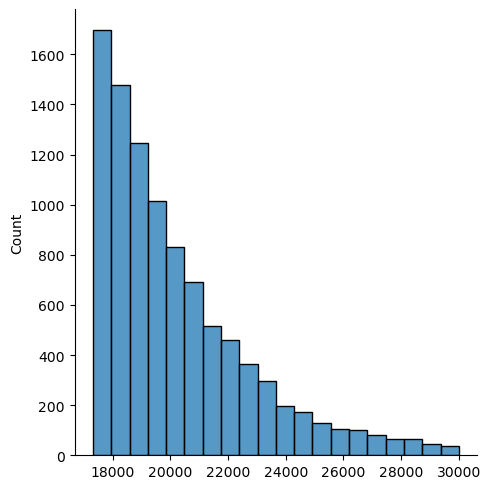

In [108]:
thresh = 3
outlier = []
for i in combined['Sales']:
    z = (i-mean_sales)/std_sales
    if z > thresh:
        outlier.append(i)
        
sns.displot(x = outlier, bins = 20)

## Based on the z-scores an the outlier distribution, we can remove any sales that are greater than 30K

In [35]:
combined.drop(combined.loc[combined['Sales'] > 30000].index, inplace = True)

## Now that our data is cleaned, we will start with linear regression in this Machine Learning Project

<Axes: >

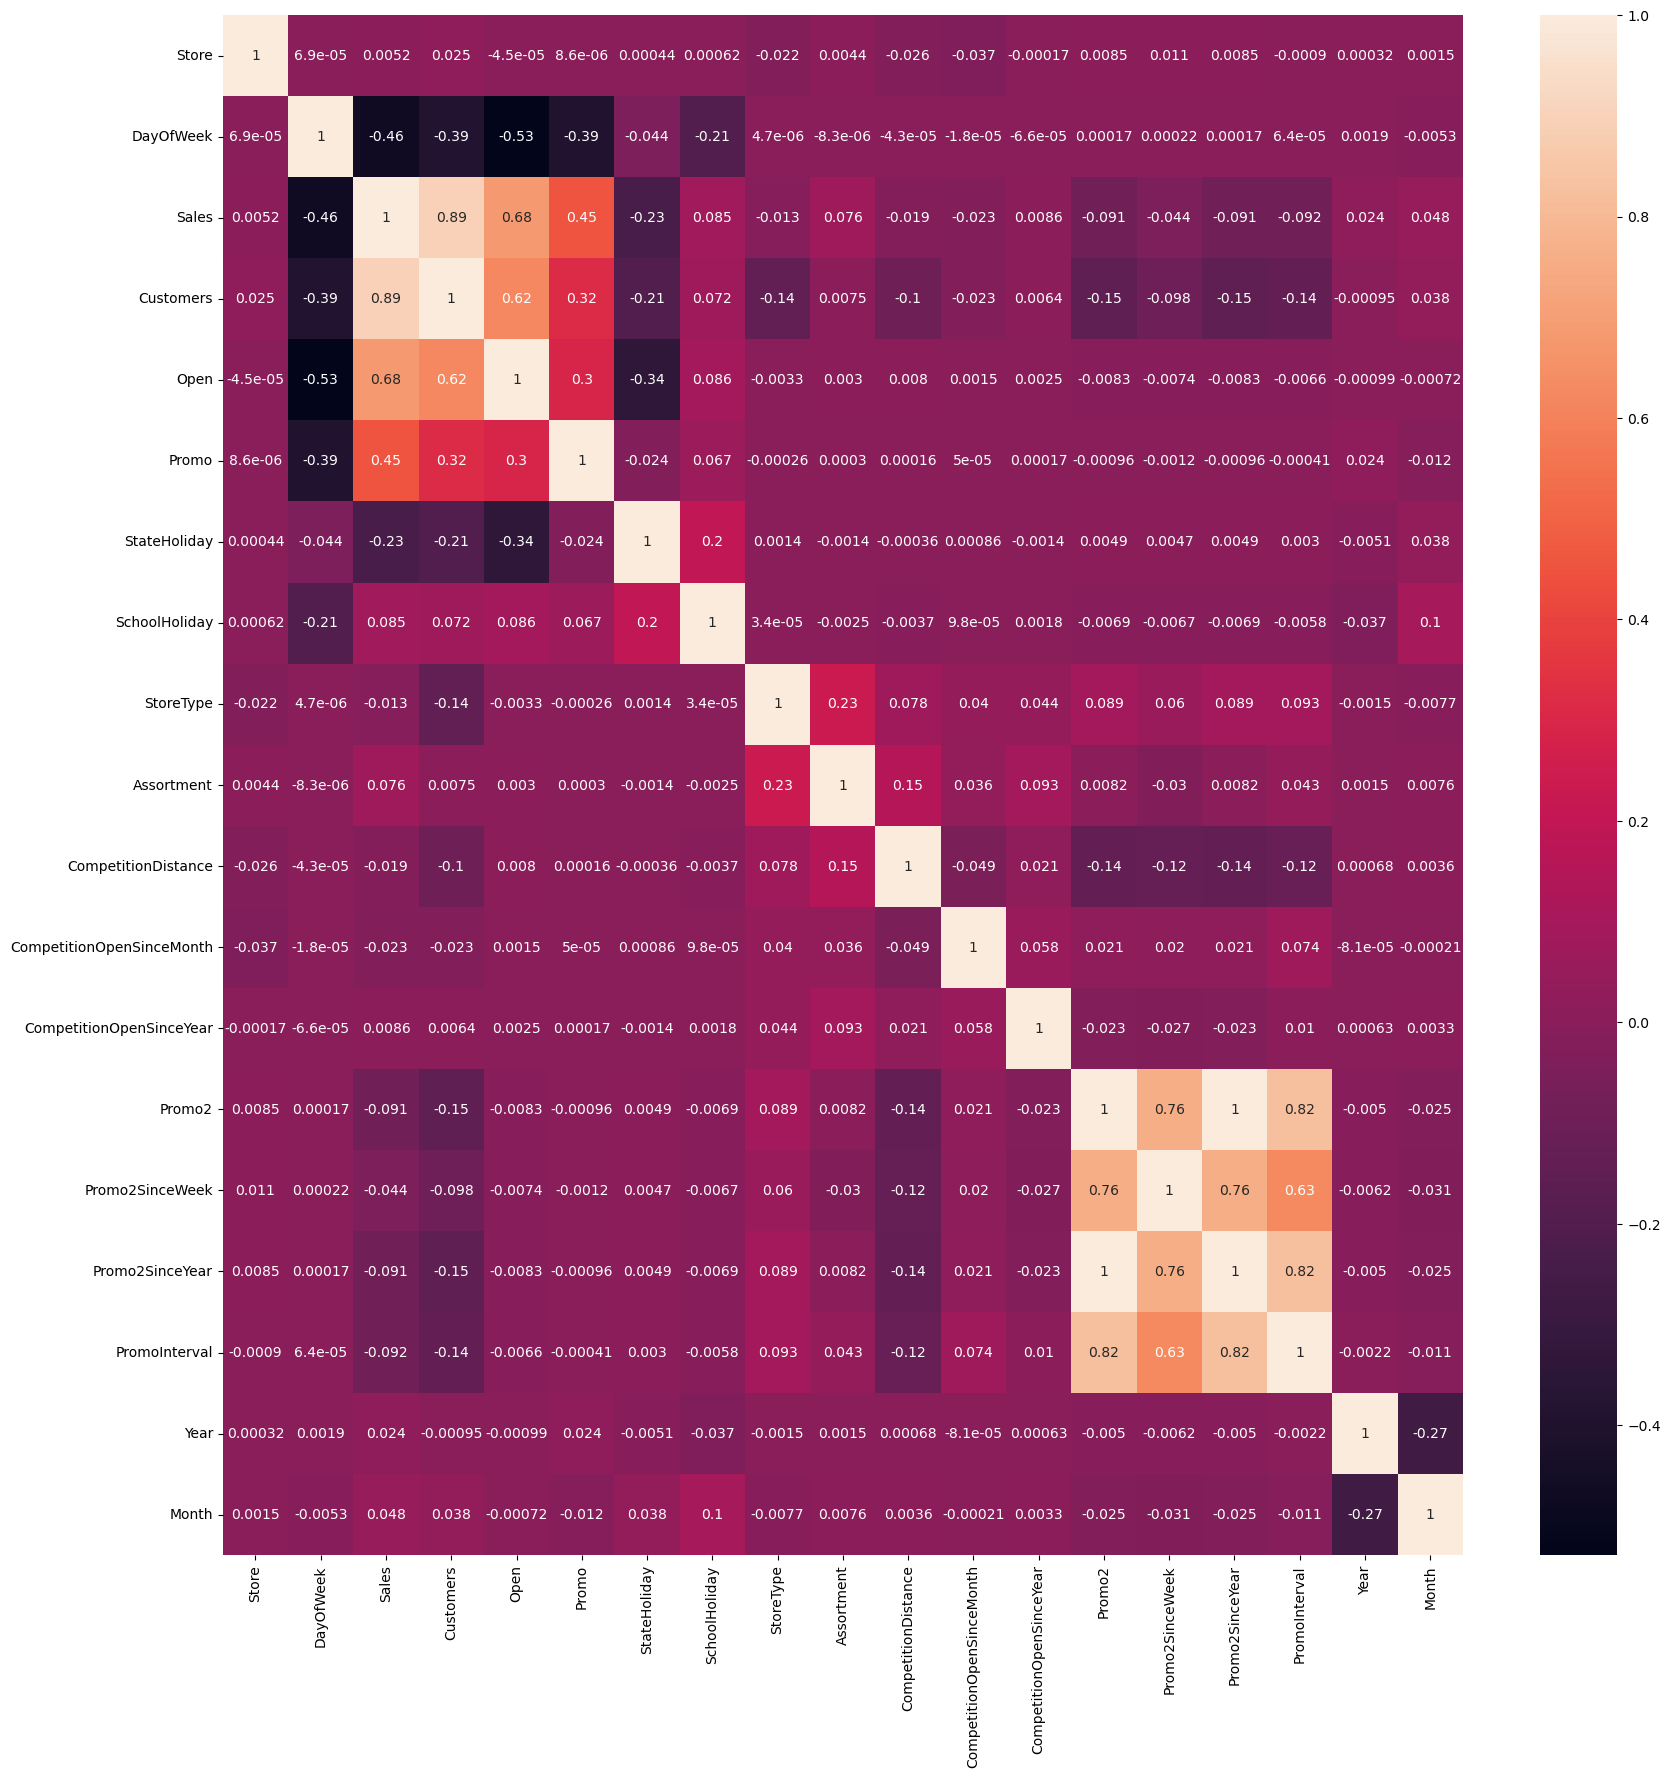

In [36]:
# I first want to look at the relationships between the variables- any predictor variables that are highly
#correlated can distort the results

plt.figure(figsize = (20,20))
sns.heatmap(combined.corr(), annot = True)

### The sales variable has relatively high correlation with Customers, Open, and Promo
### All of the Promo variables are highly correlated with each other

# Machine Learning: Linear Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.formula.api import ols
import math

In [38]:
combined_subset = combined[combined['Open'] == 1]
combined_store_closed = combined[combined['Open'] == 0]
X = combined_subset.drop(['Sales', 'Open'], axis = 1)
y = combined_subset['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = .2)

# We are dropping Open because when a store is closed it's clear that the sales will be 0- we don't need 
#machine learning to tell us that.
# We are predicting Sales, so that goes in in the Y data.

In [39]:
print(X_test.shape)
print(y_test.shape)

print(X_train.shape)
print(y_train.shape)

#checking to make sure the data is setup the way it should be

(168848, 17)
(168848,)
(675391, 17)
(675391,)


In [40]:
rhs = '+'.join(X_train.columns)
model = ols('Sales ~' +rhs, data = combined_subset).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 1.604e+05
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:02:50   Log-Likelihood:            -7.3722e+06
No. Observations:              844239   AIC:                         1.474e+07
Df Residuals:                  844221   BIC:                         1.474e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [41]:
y_pred = model.predict(X_test)
#This will generate the predictions for the target variables, Sales, based on the input data from X_train.
#It will also allow us to get the test errors

In [78]:
r2 = r2_score(y_test, y_pred)
print('The Linear Regression Model had an r-squared value of', r2)

mae = mean_absolute_error(y_test, y_pred)
print('The Linear Regression Model had a mean absolute error of', mae)

root_mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('The Linear Regression Model had a root mean squared error of', root_mse)



The Linear Regression Model had an r-squared value of 0.7642021559406611
The Linear Regression Model had a mean absolute error of 1040.1909599807466
The Linear Regression Model had a root mean squared error of 1501.0935811704874


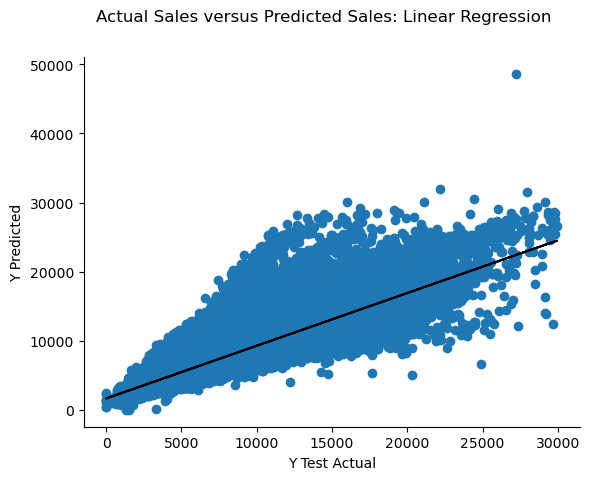

In [43]:
fig, ax = plt.subplots()

plt.scatter(x = y_test, y = y_pred)
fig.suptitle("Actual Sales versus Predicted Sales: Linear Regression")
ax.xaxis.set_label_text('Y Test Actual')
ax.yaxis.set_label_text('Y Predicted')

ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True, direction = 'out')
ax.yaxis.set_tick_params(which = 'both', right = False, bottom = True, labelleft = True, direction = 'out')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#setting regression trend line

m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color = 'black')
plt.show()

## Linear Regression Summary

## We predicted Sales against 18 predictor variabables; the resulting r-squared, which tells us that 76.5% of the data fits the regression model.  All of the predictor variables have a statistically significant p-value, meaning they are contributing to the model.  However, it is important to note that some of these variables are subject to collinearity, meaning they are related to each other. This is particularly true of the Promo variables.  The presence of multicollinearity can affect the model.  It can make it harder to pinpoint what specific varaibles are statistically significant as multicollinearity can lead to wider confident intervals.  

## The Mean Absolute Error (MAE) tells us the difference between the actual values and the predicted values.  We want the MAE to be as low as possible- a score of 0 indicates your model is perfect.  For this model we have an MAE of 1501.09; this is high, but we have to look at this relative to the data.  The max sales we have for y_test is 29,944 and the minimum is 0, as we can see in the histogram below:


0
29944


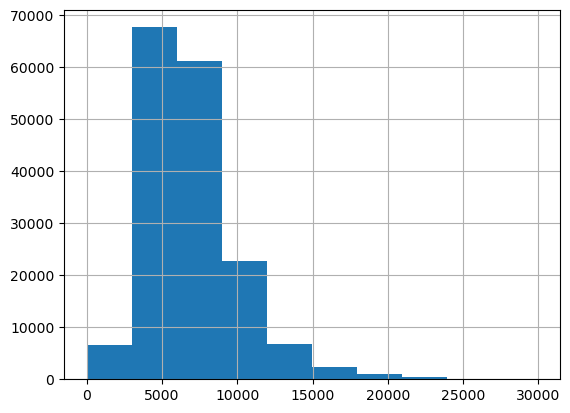

In [98]:
y_test.hist()
print(y_test.min())
print(y_test.max())

## Let's see if any other machine learning methods will produce better results

# Machine Learning: Random Forest

## Random Forest builds many decision trees, but unlike regular decision trees, every time a tree split is considered, a random number of variables (predictors) are used.  By introducing more randomness by selecting a random subset of features, we can reduce variance nad improve accuracy.

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 1, oob_score = True)
#the default number of trees is 100

rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=1)

In [46]:
from sklearn import metrics

rf_pred = rf.predict(X_test)

In [47]:
rf_r2 = r2_score(y_test, rf_pred)
print('The Random Forest Model had an r-squared value of', rf_r2)

rf_mae = mean_absolute_error(y_test, rf_pred)
print('The Random Forest Model had a mean absolute error of', rf_mae)

rf_root_mse = math.sqrt(mean_squared_error(y_test, rf_pred))
print('The Random Forest Model had a root mean squared error of', rf_root_mse)

The Random Forest Model had an r-squared value of 0.9760508890097371
The Random Forest Model had a mean absolute error of 322.21230663326
The Random Forest Model had a root mean squared error of 478.3905049702328


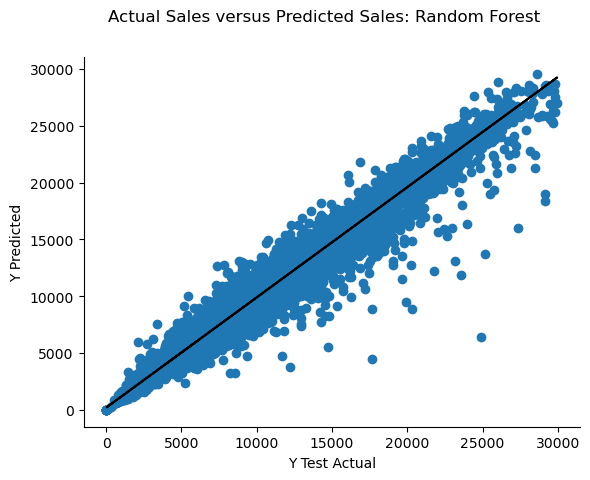

In [48]:
fig, ax = plt.subplots()

plt.scatter(x = y_test, y = rf_pred)
fig.suptitle("Actual Sales versus Predicted Sales: Random Forest")
ax.xaxis.set_label_text('Y Test Actual')
ax.yaxis.set_label_text('Y Predicted')

ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True, direction = 'out')
ax.yaxis.set_tick_params(which = 'both', right = False, bottom = True, labelleft = True, direction = 'out')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#setting regression trend line

m, b = np.polyfit(y_test, rf_pred, 1)
plt.plot(y_test, m * y_test + b, color = 'black')
plt.show()

In [49]:
combined['Sales'].mean()

5769.83004279017

# Random Forest Summary

## This model performed far better than the Linear Regression model; its r-squared is was just above 97% on the test set, that indicates it can explain 97% of the data fits the model.  We can visually see this in the graph above.  It does appear to be slightly biased below the fit line, with more datapoints here, but that makes sense given the distirubtion was right skewed.

# Machine Learning: Boosting

## Boosting is an ensemble learning method that is an extenstion of Bagging.  In Bagging, the model uses bootstrap sampling to improve accuracy by training over multiple datasets.  Whereas in Boosting, the model grows weak decision trees sequentially: each tree is grown using information from previously grown trees.

## Let's see if we can determine whether we will have a high sales day or low sales day based on the different features

## To do this, we will have to change sales to a factor; we do have a wide range of sales ranging from 0 to 30K, with a mean of around 5.7K.  I will transform the sales column to indicat a 1 for a high sales day with sales over 6K and a 0 with any less than that.


In [51]:
combined['High_Sales'] = 1
combined.loc[combined['Sales'] < 6000, "High_Sales"] = 0

In [55]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

boost = GBR(n_estimators = 100, learning_rate = 1, max_depth =3, random_state = 1)
# Note we can decrease the learning rate ann increase the number of trees, but it can become 
#computationally expensive.
boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, random_state=1)

In [51]:
import sklearn

scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
# This standardizes the data to have a mean of zero and a standard deviation of one

#svm_classifier = sklearn.svm.LinearSVC()
#svm_classifier.fit(X_train, y_train)

#lin_svm_pred = svm_classifier.predict(scaler.transform(X_test))

#accuracy = sklearn.metrics.accuracy_score(y_test, lin_svm_pred)
#print(accuracy)

In [58]:
boost_pred = boost.predict(X_test)

boost_r2 = r2_score(y_test, boost_pred)
print('The Boosting Model had an r-squared value of', boost_r2)

boost_mae = mean_absolute_error(y_test, boost_pred)
print('The Boosting Model had a mean absolute error of', boost_mae)

boost_root_mse = math.sqrt(mean_squared_error(y_test, boost_pred))
print('The Boosting Model had a root mean squared error of', boost_root_mse)

The Boosting Model had an r-squared value of 0.9396345750351207
The Boosting Model had a mean absolute error of 558.7303782297763
The Boosting Model had a root mean squared error of 759.5073553315757


## Comparing the three models and their test errors:

In [84]:
data = [['Linear', r2, mae, root_mse], ['Random Forest', rf_r2, rf_mae, rf_root_mse],
        ['Bagging', boost_r2, boost_mae, boost_root_mse]]
df = pd.DataFrame(data, columns = ['Method', 'R2', 'MAE', 'RMSE'])
df.set_index(['Method'], inplace = True)
df

,R2,MAE,RMSE
Method,,,
Linear,0.764202,1040.190960,1501.093581
Random Forest,0.976051,322.212307,478.390505
Bagging,0.939635,558.730378,759.507355


## We can see that the Random Forest machine learning model did the best at predicting sales.  Let's see what features were the most important to the model to drive predictions



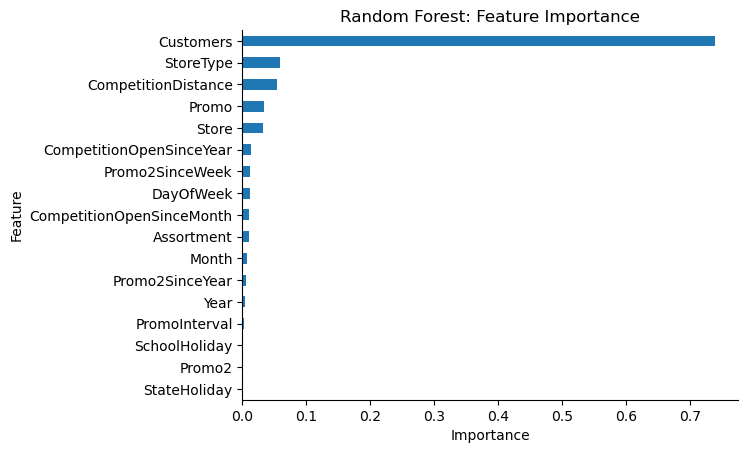

In [112]:
importance = pd.Series(rf.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=True, inplace=True)

ax = importance.plot(kind = 'barh')
ax.set_ylabel("Feature")
ax.set_xlabel("Importance")
ax.set_title("Random Forest: Feature Importance")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## The number of customers by far affected the sales of a store, which makese sense, more customers will typically generate more sales.  The store type, which indicates different store models, along with competition distance, which measures how far away a competitor is, were also factors.

## Because the number of customers is a high contributor of sales, the company should focus on getting more customers to the store.  They can do promotions, but there are other ways of bringing in business as well.  For example, the store can hold special events, like vendor booths around certain holidays like Mother's Day, Valentine's Day, or Christmas.  This can bring in extra foot traffice and potentially increase sales.  Additionally, they complete a market analysis to see if there is an untapped customer segment where they can focus their marketing efforts and introduce new products.